In [28]:
import requests
from dotenv import load_dotenv
import os
from datetime import datetime, timedelta

# Load environment variables from .env file
load_dotenv()

def get_exchange_rate():
    access_key = os.getenv("API_ACCESS_KEY")  # Load the API key from the .env file

    if not access_key:
        print("API key is missing. Please set it in the .env file.")
        return

    # Get the current date and calculate the start date for the last 2 days (or 5 days as needed)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5)  # Adjust to 5 days if needed

    # Format the dates as strings in 'YYYY-MM-DD' format
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')
    
    print(start_date_str, end_date_str)

    # Construct the URL to fetch exchange rates over the last 5 days
    url = f"https://api.exchangerate.host/timeframe?start_date={start_date_str}&end_date={end_date_str}&access_key={access_key}&base=EUR&symbols=USD"

    print(url)

    try:
        # Make the API request
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        data = response.json()

        # Debugging: Print the raw response
        return data

    except requests.exceptions.RequestException as e:
        print(f"Error fetching exchange rates: {e}")

# Call the functiono exchange rate data av
data = get_exchange_rate()

2025-01-05 2025-01-10
https://api.exchangerate.host/timeframe?start_date=2025-01-05&end_date=2025-01-10&access_key=92ed2a4e660c45e20ba187880edd6148&base=EUR&symbols=USD


In [50]:
import pandas as pd

df = pd.DataFrame(data["quotes"])
df.filter(like='EUR', axis=0)

,2025-01-05,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10
USDEUR,0.97041,0.96295,0.966698,0.96953,0.971165,0.97515


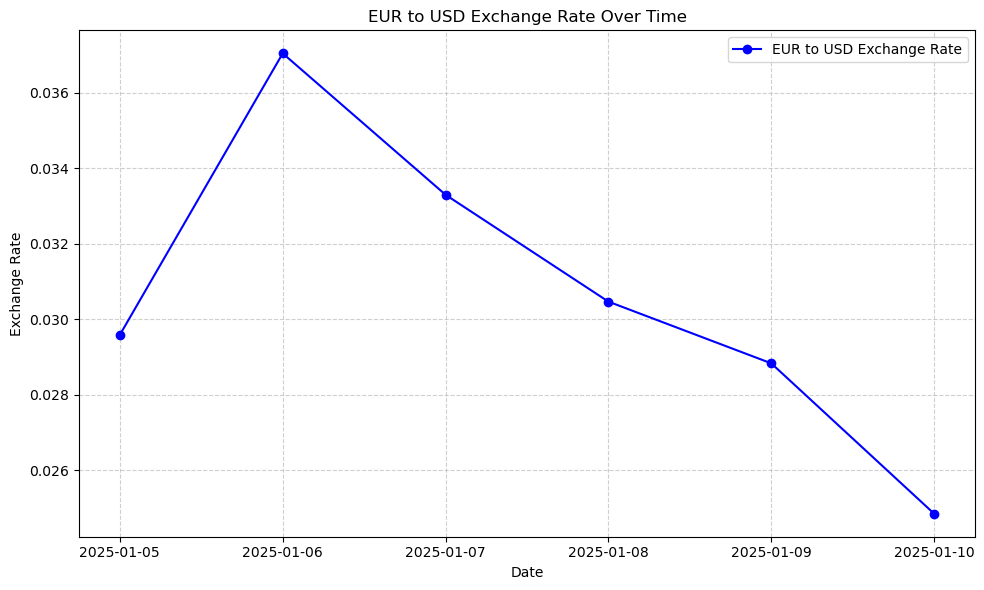

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

obj = {
    "Date": [],
    "EURUSD": []
}

for col in df.columns:
    obj["Date"].append(col)
    obj["EURUSD"].append(abs(df[col]['USDEUR'] - 1))


# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(obj["Date"], obj["EURUSD"], marker='o', color='b', label="EUR to USD Exchange Rate")
plt.title("EUR to USD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()